# Анализ источников трафика и распределения бюджета Яндекс.Афиши.

В проекте мы будем изучать:
- как клиенты пользуются сервисом,
- когда делают первые покупки на сайте,
- сколько денег приносит компании каждый клиент,
- когда расходы на привлечение клиента окупаются.

Наша цель - помочь маркетологам оптимизировать расходы на невыгодные источники трафика.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных.-Подготовка-к-анализу." data-toc-modified-id="Загрузка-данных.-Подготовка-к-анализу.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных. Подготовка к анализу.</a></span><ul class="toc-item"><li><span><a href="#Визиты" data-toc-modified-id="Визиты-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Визиты</a></span></li><li><span><a href="#Заказы" data-toc-modified-id="Заказы-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Заказы</a></span></li><li><span><a href="#Расходы" data-toc-modified-id="Расходы-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Расходы</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Расчет-метрик-и-построение-графиков" data-toc-modified-id="Расчет-метрик-и-построение-графиков-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчет метрик и построение графиков</a></span><ul class="toc-item"><li><span><a href="#Продуктовые-метрики" data-toc-modified-id="Продуктовые-метрики-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Продуктовые метрики</a></span><ul class="toc-item"><li><span><a href="#DAU" data-toc-modified-id="DAU-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>DAU</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#WAU" data-toc-modified-id="WAU-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>WAU</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#MAU" data-toc-modified-id="MAU-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>MAU</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.6"><span class="toc-item-num">3.1.6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Среднее-количество-использований-сервиса-в-день" data-toc-modified-id="Среднее-количество-использований-сервиса-в-день-3.1.7"><span class="toc-item-num">3.1.7&nbsp;&nbsp;</span>Среднее количество использований сервиса в день</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.8"><span class="toc-item-num">3.1.8&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Время-сессии" data-toc-modified-id="Время-сессии-3.1.9"><span class="toc-item-num">3.1.9&nbsp;&nbsp;</span>Время сессии</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.10"><span class="toc-item-num">3.1.10&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Retention-Rate" data-toc-modified-id="Retention-Rate-3.1.11"><span class="toc-item-num">3.1.11&nbsp;&nbsp;</span>Retention Rate</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1.12"><span class="toc-item-num">3.1.12&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Метрики-электронной-коммерции" data-toc-modified-id="Метрики-электронной-коммерции-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Метрики электронной коммерции</a></span><ul class="toc-item"><li><span><a href="#Среднее-время-с-первого-посещения-сайта-до-первой-покупки" data-toc-modified-id="Среднее-время-с-первого-посещения-сайта-до-первой-покупки-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Среднее время с первого посещения сайта до первой покупки</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Среднее-количество-покупок-на-одного-покупателя-за-6-месяцев" data-toc-modified-id="Среднее-количество-покупок-на-одного-покупателя-за-6-месяцев-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Среднее количество покупок на одного покупателя за 6 месяцев</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Средний-чек" data-toc-modified-id="Средний-чек-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Средний чек</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.2.6"><span class="toc-item-num">3.2.6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#LTV" data-toc-modified-id="LTV-3.2.7"><span class="toc-item-num">3.2.7&nbsp;&nbsp;</span>LTV</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.2.8"><span class="toc-item-num">3.2.8&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Маркетинговые-метрики" data-toc-modified-id="Маркетинговые-метрики-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Маркетинговые метрики</a></span><ul class="toc-item"><li><span><a href="#Расходы-на-маркетинг" data-toc-modified-id="Расходы-на-маркетинг-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Расходы на маркетинг</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Средний-САС-для-всего-проекта" data-toc-modified-id="Средний-САС-для-всего-проекта-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Средний <code>САС</code> для всего проекта</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Средний-САС-по-источникам" data-toc-modified-id="Средний-САС-по-источникам-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>Средний <code>САС</code> по источникам</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3.6"><span class="toc-item-num">3.3.6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#ROMI" data-toc-modified-id="ROMI-3.3.7"><span class="toc-item-num">3.3.7&nbsp;&nbsp;</span><code>ROMI</code></a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3.8"><span class="toc-item-num">3.3.8&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы и рекомендации</a></span><ul class="toc-item"><li><span><a href="#Источники-трафика" data-toc-modified-id="Источники-трафика-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Источники трафика</a></span></li><li><span><a href="#Выводы-по-метрикам" data-toc-modified-id="Выводы-по-метрикам-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Выводы по метрикам</a></span></li><li><span><a href="#Итоги-когортного-анализа" data-toc-modified-id="Итоги-когортного-анализа-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Итоги когортного анализа</a></span></li></ul></li></ul></div>

## Загрузка данных. Подготовка к анализу.

Импортируем необходимые библиотеки

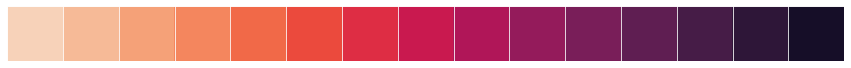

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings

warnings.filterwarnings("ignore")
pd.set_option('max_columns', None)
sns.set_palette('rocket_r', n_colors=15)
sns.set_style('darkgrid')
pal = sns.color_palette('rocket_r', n_colors=15)
sns.palplot(pal)

### Визиты

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Таблица не содержит пропусков, данные выглядят корректно. Столбцы `End Ts` и `Start Ts` содержат даты и имеют неверный тип. Столбцы имеют нечитаемые названия. Приведем их к привычному виду.

In [3]:
visits = visits.rename(columns={'Device':'device', 'End Ts': 'session_end', 'Source Id': 'source_id', 'Start Ts': 'session_start', 'Uid': 'user_id'})
print(visits.columns)

Index(['device', 'session_end', 'source_id', 'session_start', 'user_id'], dtype='object')


Приведем столбцы `session_end` и `session_start` к типу `datetime`

In [4]:
visits['session_end'] = pd.to_datetime(visits['session_end'], format = '%Y-%m-%d %H:%M:%S')
print(visits['session_end'].dtypes)
visits['session_start'] = pd.to_datetime(visits['session_start'], format = '%Y-%m-%d %H:%M:%S')
print(visits['session_start'].dtypes)

datetime64[ns]
datetime64[ns]


Проверим столбцы с датой на логику.

In [5]:
visits[visits['session_start'] > visits['session_end']]

,device,session_end,source_id,session_start,user_id
4181,desktop,2018-03-25 03:18:00,3,2018-03-25 03:50:00,13092152539246794986
177972,desktop,2018-03-25 03:09:00,9,2018-03-25 03:55:00,4621202742905035453


Удалим строки с ошибками

In [6]:
visits = visits.drop([4181, 177972]).reset_index(drop=True)

### Заказы

In [7]:
orders = pd.read_csv('/datasets/orders_log.csv')
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


В таблице нет пропусков, столбец `Buy Ts` содержит дату и имеет неверный тип. Названия столбцов содержат разные регистры и пробелы. 

Переименуем столбцы

In [8]:
orders = orders.rename(columns={'Buy Ts':'order_datetime', 'Revenue': 'revenue', 'Uid': 'user_id'})
print(orders.columns)

Index(['order_datetime', 'revenue', 'user_id'], dtype='object')


Иземеним тип данных в `order_date`

In [9]:
orders['order_datetime'] = pd.to_datetime(orders['order_datetime'], format = '%Y-%m-%d %H:%M:%S')
print(orders['order_datetime'].dtypes)

datetime64[ns]


Проверим столбец `revenue` на корректность данных.

In [10]:
orders[orders['revenue'] < 0]['revenue'].count()

0

### Расходы

In [11]:
costs = pd.read_csv('/datasets/costs.csv')
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Данные не содержат пропусков, столбец, содержащий дату, имеет неверный тип и неудобное название.

In [12]:
costs = costs.rename(columns={'dt':'cost_date'})
print(costs.columns)
costs['cost_date'] = pd.to_datetime(costs['cost_date'], format = '%Y-%m-%d %H:%M:%S')
print(costs['cost_date'].dtypes)

Index(['source_id', 'cost_date', 'costs'], dtype='object')
datetime64[ns]


## Вывод

Данные в порядке, пропусков не содержат. Столбцы с датами перевели в нужный тип, неудобные именования столбцов сменили на привычные. Приступим к расчету метрик.

## Расчет метрик и построение графиков

### Продуктовые метрики

Выделим из даты день, неделю, месяц и год.

In [13]:
visits['session_year']  = visits['session_start'].dt.year
visits['session_month'] = visits['session_start'].dt.month
visits['session_week']  = visits['session_start'].dt.week
visits['session_date'] = visits['session_start'].dt.date
visits['session_date'] = pd.to_datetime(visits['session_date'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359398 entries, 0 to 359397
Data columns (total 9 columns):
device           359398 non-null object
session_end      359398 non-null datetime64[ns]
source_id        359398 non-null int64
session_start    359398 non-null datetime64[ns]
user_id          359398 non-null uint64
session_year     359398 non-null int64
session_month    359398 non-null int64
session_week     359398 non-null int64
session_date     359398 non-null datetime64[ns]
dtypes: datetime64[ns](3), int64(4), object(1), uint64(1)
memory usage: 24.7+ MB


Напишем функцию для построения графиков.

In [14]:
def met_plot(data, name):
    plt.figure(figsize=(16,6))
    data['user_id'].plot(title='Динамика ' + name, color=pal[12], ylim=0)
    plt.xlabel('Время')
    plt.ylabel('Значение ' + name)
    plt.show()

#### DAU

In [15]:
dau = visits.groupby('session_date').agg({'user_id': 'nunique'})
mean_dau = round(float(dau.mean()),2)
print('Средний показатель DAU:', mean_dau)

Средний показатель DAU: 907.99


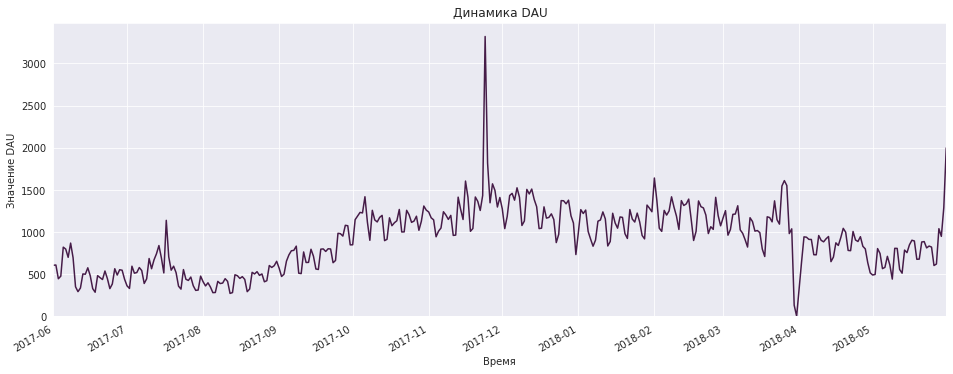

In [16]:
met_plot(dau, 'DAU')

#### Вывод

Так как мы рассматриваем большой период, показатель `DAU` получился шумным. По сути, метрика практически не изменялась в течении всего года, заметен небольшой рост в период с августа по декабрь 2017 года, а так же небольшой спад после апреля 2018. На фоне общей картины выделяется выброс в декабре 2017, количество покупателей выросло в несколько раз, и спад до нуля в апреле 2018. Каждый день сервис посещают в среднем 907 пользователей.

#### WAU

In [17]:
wau = visits.groupby(['session_year', 'session_week']).agg({'user_id': 'nunique'})
mean_wau = round(float(wau['user_id'].mean()),2)
print('Средний показатель WAU:', mean_wau)

Средний показатель WAU: 5716.25


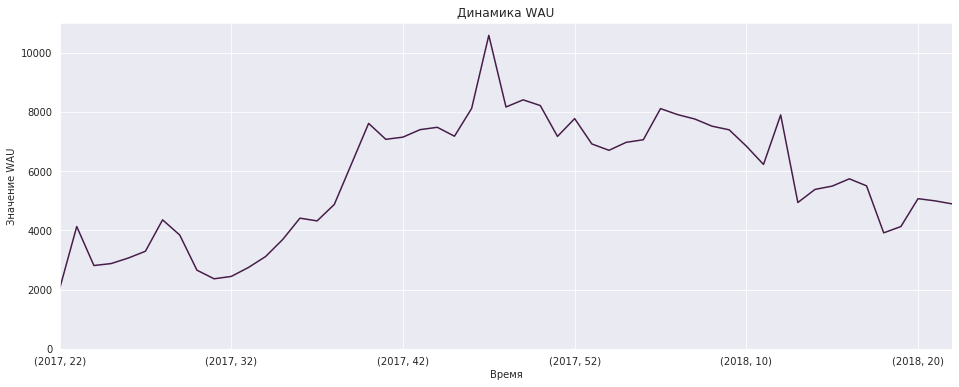

In [18]:
met_plot(wau, 'WAU')

#### Вывод

Метрика `WAU` имеет внушительный разброс. В тот же период, что и `DAU`, с августа по ноябрь 2017 года, наблюдается уже существенные рост количества пользователей, которые посетили сервис за неделю. Однако стоит обратить внимание, что после нового года показатели `WAU` постепенно снижаются. Возможно, люди активнее покупают билеты в новогодний период (с ноября по февраль), либо активность пользователей снижается по другой причине. В среднем, за год, еженедельно сервис посещало 5716 человек.

#### MAU

In [19]:
mau = visits.groupby(['session_year', 'session_month']).agg({'user_id': 'nunique'})
mean_mau = round(float(mau['user_id'].mean()),2)
print('Средний показатель MAU:', mean_mau)

Средний показатель MAU: 23228.42


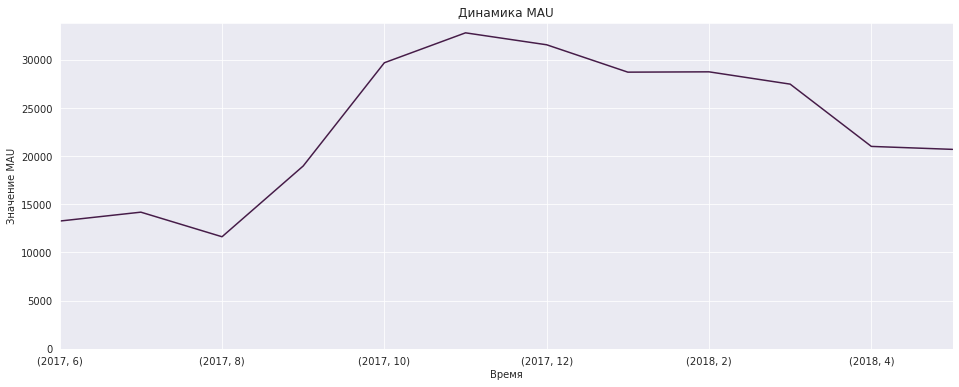

In [20]:
met_plot(mau, 'MAU')

#### Вывод

Графики изменения `MAU` и `WAU` схожи. `MAU` имеет меньше шума, без которого мы видим реальную картину. Сервис стали посещать в 2 раза больше пользователей в месяц в период с августа по ноябрь 2017. После пика в ноябре, показатели метрики постепенно снижаются, нужно обратить на это внимание и выяснить причину. В среднем, за год, ежемесячно сервис посещало 23228 человек.

#### Среднее количество использований сервиса в день

In [21]:
sessions_mean = visits.groupby(['session_date', 'user_id']).agg({'session_start': 'count'})
sessions_mean = sessions_mean.groupby('session_date').agg({'session_start': 'mean'})
print('Среднее количество сессий в день:',round(sessions_mean['session_start'].mean(),2))

Среднее количество сессий в день: 1.08


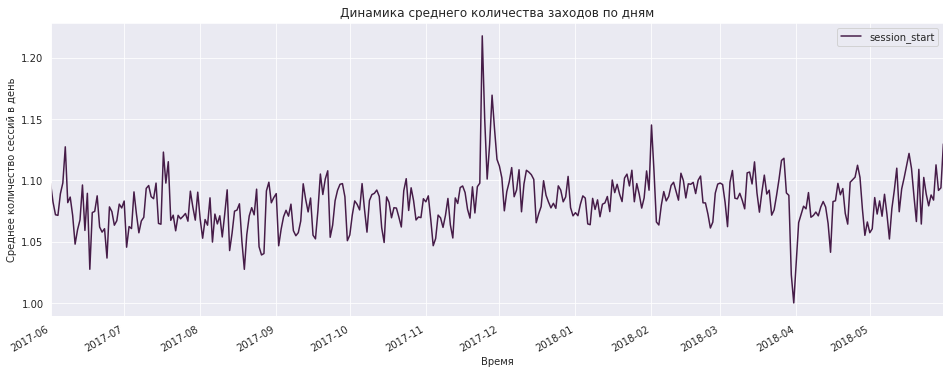

In [22]:
sessions_mean.plot(figsize=(16,6), color=pal[12], title='Динамика среднего количества заходов по дням')
plt.xlabel('Время')
plt.ylabel('Среднее количество сессий в день')
plt.show()

#### Вывод

Среднее количество сессий в день - 1.08. Это значит, что практически никто не использует сервис более 1 раза в день. Это абсолютно нормальный показатель для сервиса по продаже билетов, редко кто покупает или смотрит билеты по нескольку раз в день. 

На графике видно, что показатель не изменяется с течением времени, тенденций на графике не наблюдается. Виден уже знакомый по метрике `DAU` выброс средних посещений в декабре 2017, и спад до в апреле 2018.

#### Время сессии

Создадим столбец, в который положим продолжительность каждого визита в секундах.

In [23]:
visits['session_duration_sec'] = (visits['session_end'] - visits['session_start']).dt.seconds

Посмотрим на распределение.

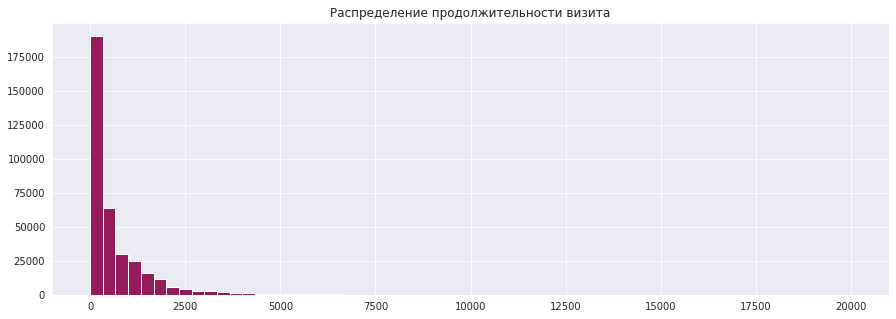

In [24]:
visits['session_duration_sec'].hist(figsize=(15,5), bins=60, range=(0,20000), color=pal[9])
plt.title('Распределение продолжительности визита')
plt.show()

Так как распределение сильно отличается от нормального, вместо среднего будем использовать моду.

In [25]:
print('Продолжительность типичной пользовательской сессии за весь период:', int(visits['session_duration_sec'].mode()), 'сек.')

Продолжительность типичной пользовательской сессии за весь период: 60 сек.


#### Вывод

В созданном нами столбце наблюдается неравномерное распределение, поэтому использовали моду, для подсчета типичной сессии. Как правило, пользователю хватает 1 минуты. Это значит, что сервис удобный и понятный, клиенты не тратят времени на то, чтобы разобраться в нем.

#### Retention Rate

Для начала получим дату первого визита для каждого пользователя.

In [26]:
first_session_date = visits.groupby('user_id')['session_date'].min()
first_session_date.name = 'first_session_date'
visits = visits.merge(first_session_date, on='user_id')

Создадим столбцы с месяцами, для группировки.

In [27]:
visits['first_session_month'] = visits['first_session_date'].astype('datetime64[M]')
visits['session_month'] = visits['session_date'].astype('datetime64[M]')

На основе столбцов с месяцами получим столбец, в который положим `lifetime` для когорт.

In [28]:
visits['lifetime'] = (visits['session_month'] - visits['first_session_month']) / np.timedelta64(1,'M')
visits['lifetime'] = visits['lifetime'].round().astype('int')
visits.head()

,device,session_end,source_id,session_start,user_id,session_year,session_month,session_week,session_date,session_duration_sec,first_session_date,first_session_month,lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,51,2017-12-20,1080,2017-12-20,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,8,2018-02-19,1680,2018-02-19,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,26,2017-07-01,0,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,20,2018-05-20,1440,2018-03-09,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,2018-03-01,10,2018-03-09,1680,2018-03-09,2018-03-01,0


Создадим отдельный объект, в котором сгруппируем данные по когортам.

In [29]:
cohorts = visits.groupby(['first_session_month','lifetime']).agg({'user_id':'nunique'}).reset_index()
cohorts.head()

,first_session_month,lifetime,user_id
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


Для того, чтобы расчитать `Retention Rate` найдём исходное количество пользователей в когорте.

In [30]:
users_count = cohorts.query('lifetime == 0')[['first_session_month', 'user_id']]
users_count = users_count.rename(columns={'user_id':'cohort_users'}) 
cohorts = cohorts.merge(users_count, on='first_session_month')
cohorts.head()

,first_session_month,lifetime,user_id,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259


Вычислим `Retention Rate`, сделаем срез без нулевых `lifetime`, для наглядности на графике.

In [31]:
cohorts['rr'] = cohorts['user_id'] / cohorts['cohort_users'] 
cohorts['rr'] = cohorts['rr']
cohorts = cohorts.query('lifetime != 0')
cohorts.head()

,first_session_month,lifetime,user_id,cohort_users,rr
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557
5,2017-06-01,5,947,13259,0.071423


Создадим сводную таблицу, построим `heatmap`.

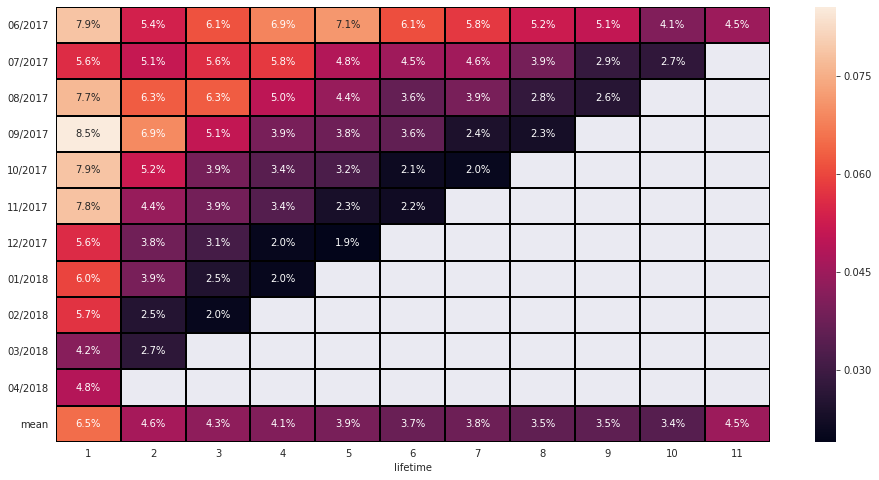

In [32]:
pivot = cohorts.pivot_table(index='first_session_month', columns='lifetime', values='rr')
pivot.index = pivot.index.strftime("%m/%Y")
pivot.loc['mean'] = pivot.mean()

plt.figure(figsize=(16,8))
sns.heatmap(pivot, annot=True, fmt='.1%', linewidth=1, linecolor='black')
plt.show()

Так же, подсчитаем средний `Retention Rate` на второй месяц «жизни» когорт.

In [33]:
cohorts.query('lifetime == 1')['rr'].mean()

0.06516659710392834

#### Вывод

На первый взгляд, ситуация выглядит плачевно. Во второй месяц жизни когорты, к сервису возвращаются в среднем 6.5% людей, эта картина наблюдается на тепловой карте. Однако, стоит понимать, что Афиша - это сервис, который клиенты использую по мере необходимости. Это не игра или социальная сеть, в котррую пользователи возвращаются регулярно. Как часто мы сами покупаем билеты в театр? Единицы людей делают это на ежемесячной основе, поэтому `Retention Rate` не самая подходящая метрика для нашего продукта. 

Однако стоит отметить, что в первых трех когортах, `Retention Rate` снижается медленнее. Старые клиенты возвращаются чаще, чем новые.

### Метрики электронной коммерции

#### Среднее время с первого посещения сайта до первой покупки

Данную метрику будем измерять в днях, такой детализации будет вполне достаточно. 

Найдем для каждого пользователя дату первой покупки.

In [34]:
orders['order_date'] = orders['order_datetime'].dt.date
orders['order_date'] = pd.to_datetime(orders['order_date'])

first_order_date = orders.groupby('user_id')['order_date'].min()
first_order_date.name = 'first_order_date'
orders = orders.merge(first_order_date, on='user_id')

first_orders_date = orders.drop_duplicates('user_id').reset_index(drop=True)[['user_id', 'first_order_date']]

first_orders_date

,user_id,first_order_date
0,10329302124590727494,2017-06-01
1,11627257723692907447,2017-06-01
2,17903680561304213844,2017-06-01
3,16109239769442553005,2017-06-01
4,14200605875248379450,2017-06-01
...,...,...
36518,12296626599487328624,2018-05-31
36519,11369640365507475976,2018-05-31
36520,1786462140797698849,2018-05-31
36521,3993697860786194247,2018-05-31


Найдем для каждого пользователя дату первого визита (сгруппируем данные по `user_id`)

In [35]:
first_visits_date = visits.drop_duplicates('user_id').reset_index(drop=True)[['user_id', 'first_session_date']]
first_visits_date

,user_id,first_session_date
0,16879256277535980062,2017-12-20
1,104060357244891740,2018-02-19
2,7459035603376831527,2017-07-01
3,16174680259334210214,2018-03-09
4,9969694820036681168,2017-12-27
...,...,...
228164,12734910664455613822,2018-04-23
228165,6761309174945977743,2017-11-08
228166,11102751930812818282,2017-07-31
228167,272012551460639309,2018-03-20


Объединим в одну таблицу, подситчаем количество дней с момента первого визита до момента первого заказа

In [36]:
order_time = first_orders_date.merge(first_visits_date, on='user_id', how='left')

order_time['days_to_order'] = (order_time['first_order_date'] - order_time['first_session_date']) / np.timedelta64(1, 'D')
order_time['days_to_order'] = order_time['days_to_order'].round().astype('int')
order_time

,user_id,first_order_date,first_session_date,days_to_order
0,10329302124590727494,2017-06-01,2017-06-01,0
1,11627257723692907447,2017-06-01,2017-06-01,0
2,17903680561304213844,2017-06-01,2017-06-01,0
3,16109239769442553005,2017-06-01,2017-06-01,0
4,14200605875248379450,2017-06-01,2017-06-01,0
...,...,...,...,...
36518,12296626599487328624,2018-05-31,2018-05-31,0
36519,11369640365507475976,2018-05-31,2018-05-31,0
36520,1786462140797698849,2018-05-31,2018-05-31,0
36521,3993697860786194247,2018-05-31,2017-10-23,220


Взглянем на распределение в столбце.

count    36523.000000
mean        16.895901
std         47.071200
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: days_to_order, dtype: float64


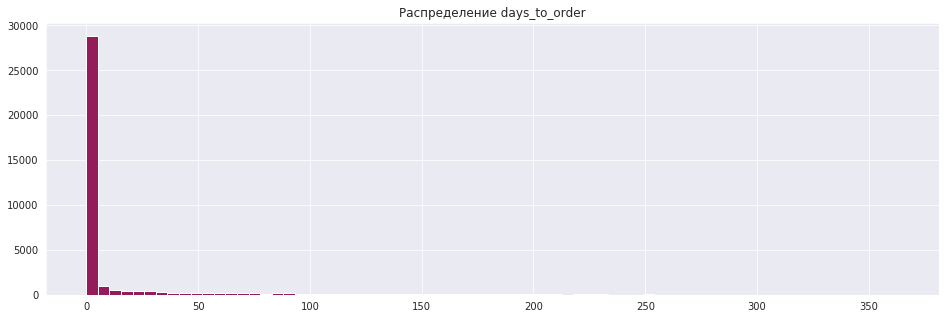

In [37]:
print(order_time['days_to_order'].describe())
order_time['days_to_order'].hist(figsize=(16,5), bins=70, color=pal[9])
plt.title('Распределение days_to_order')
plt.show()

Этой визуализации достаточно, чтобы понять, что распределение далеко от нормального, поэтому за среднее количество дней возьмем моду.

In [38]:
order_time['days_to_order'].mode()

0    0
dtype: int64

#### Вывод

Метрика говорит нам, что подавляющее большинство пользователей делают заказ в тот же день, как впервые зашли на сервис. Этот показатель характерен для нашего продукта. Чаще всего люди знают куда пойдут и используют сервис по назначению - зашли, купили.

#### Среднее количество покупок на одного покупателя за 6 месяцев

Для подсчета метрики будем использовать когортный анализ.

Выделим месяцы из даты текущего заказа и даты первого заказа.

In [39]:
orders['order_month'] = orders['order_date'].astype('datetime64[M]')
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')

Создадим колонку `lifetime`

In [40]:
orders['lifetime'] = (orders['order_month'] - orders['first_order_month']) / np.timedelta64(1,'M')
orders['lifetime'] = orders['lifetime'].round().astype('int')

Сгруппируем данные по когортам, подсчитаем количество сделанных заказов и пользователей.

In [41]:
cohorts = orders.groupby(['first_order_month', 'lifetime']).agg({'user_id': ['count', 'nunique']}).reset_index()
cohorts.columns = ['first_order_month', 'lifetime', 'orders', 'users']
cohorts.head()

,first_order_month,lifetime,orders,users
0,2017-06-01,0,2354,2023
1,2017-06-01,1,177,61
2,2017-06-01,2,174,50
3,2017-06-01,3,226,54
4,2017-06-01,4,292,88


Добавим в группировку по когортам количество пользователей в нулевой `lifetime`

In [42]:
users_count = cohorts.query('lifetime == 0')[['first_order_month', 'users']]
users_count = users_count.rename(columns={'users':'cohort_users'}) 
cohorts = cohorts.merge(users_count, on='first_order_month')
cohorts.head()

,first_order_month,lifetime,orders,users,cohort_users
0,2017-06-01,0,2354,2023,2023
1,2017-06-01,1,177,61,2023
2,2017-06-01,2,174,50,2023
3,2017-06-01,3,226,54,2023
4,2017-06-01,4,292,88,2023


Подсчитаем метрику, построим сводную таблицу и визуализируем когортный анализ.

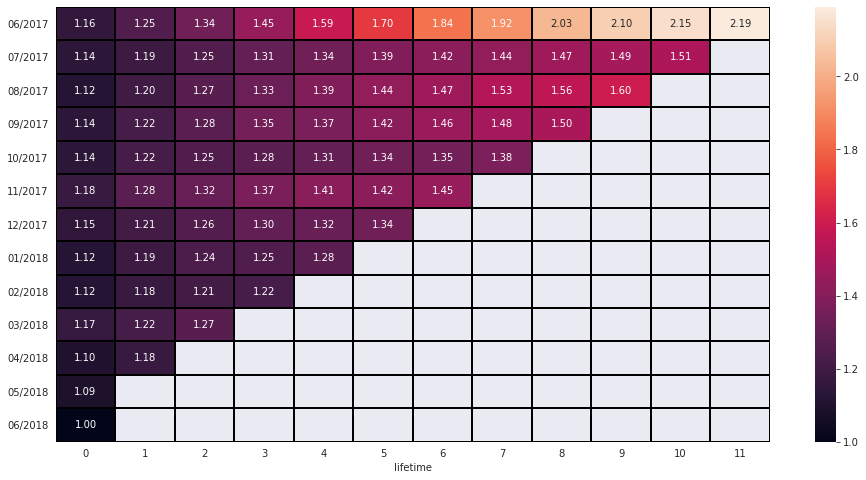

In [43]:
cohorts['metric'] = cohorts['orders'] / cohorts['cohort_users']

output = cohorts.pivot_table(index='first_order_month', columns='lifetime', values='metric', aggfunc='sum')
output = output.cumsum(axis=1).round(2)
output.index = output.index.strftime("%m/%Y")

plt.figure(figsize=(16,8))
sns.heatmap(output, annot=True, fmt='.2f', linewidth=1, linecolor='black')
plt.show()

Подсчитаем среднее количество заказов, сделанных пользователем в течении первых 6 месяцев.

In [44]:
output[5].mean().round(2)

1.44

#### Вывод

Метрика показывает нам хорошую картину. За пол года каждый покупатель делает примерно 1.5 заказа. Это значит, что каждый второй пользователь,в течении полу года, совершает повторную покупку. Метрика уверенно растет, в первой когорте за год каждый покупатель совершил в среднем более чем по 2 заказа. В остальных когортах так же наблюдается рост.

#### Средний чек

Для начала посчитаем средний чек за весь период.

In [45]:
round(orders['revenue'].mean(), 2)

5.0

Посмотрим динамику среднего чека за все время.

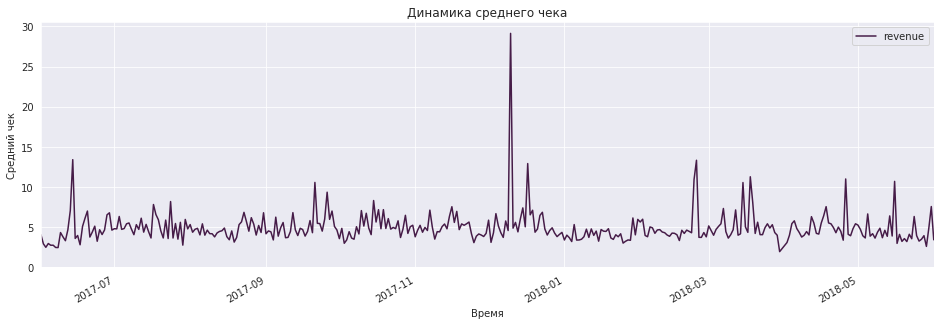

In [76]:
orders.groupby('order_date').agg({'revenue': 'mean'}).plot(figsize=(16,5), color=pal[12], ylim=0)
plt.title('Динамика среднего чека')
plt.xlabel('Время')
plt.ylabel('Средний чек')
plt.show()

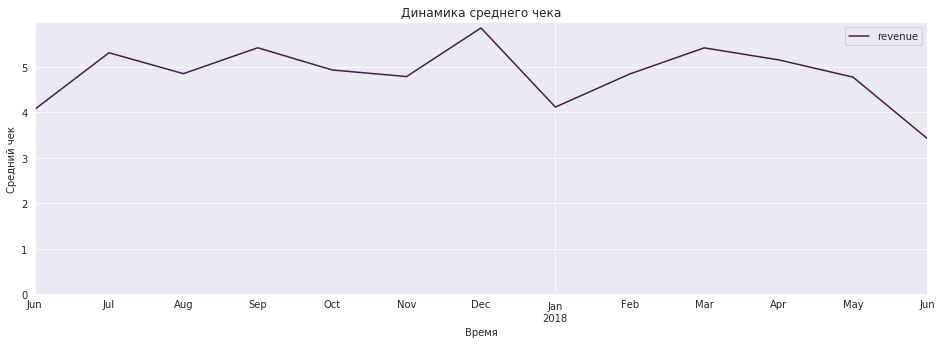

In [75]:
orders.groupby('order_month').agg({'revenue': 'mean'}).plot(figsize=(16,5), color=pal[12], ylim=0)
plt.title('Динамика среднего чека')
plt.xlabel('Время')
plt.ylabel('Средний чек')
plt.show()

Так же подсчитаем средний чек в группировке по месяцам заказа

In [47]:
orders.pivot_table(index='order_month', values='revenue')

,revenue
order_month,
2017-06-01,4.060106
2017-07-01,5.306589
2017-08-01,4.847139
2017-09-01,5.416448
2017-10-01,4.928280
2017-11-01,4.783518
2017-12-01,5.852139
2018-01-01,4.112927
2018-02-01,4.840095


#### Вывод

Средний чек практически не изменяется с течением времени, на графиках не видно тенденций. Так же, этот довод подтверждается таблицой. Средний чек всегда примерно равен 5 у.е. На графике по месяцам заметно снижение среднего чека в новогодние праздники, судя по всему, в этот период люди реже куда то выбираются.

На графике динамики по дням уже третий раз видим знакомый выброс в декабре 2017. В следующих шагах проверим теорию о том, что в этот день была проведена большая рекламная кампания, которая привлекла много пользователей(`DAU`), повысила среднее количество использований в день и увеличила средний чек. Спад в апреле так же присутствует.

#### LTV

- Сгруппируем данные о заказах по когортам и посчитаем суммарный доход. 
- Добавим в таблицу количество пользователей в нулевой `lifetime`. 
- Подсчитаем `LTV`.

In [48]:
cohorts = orders.groupby(['first_order_month', 'lifetime']).agg({'revenue': 'sum', 'user_id': 'nunique'}).reset_index()

users_count = cohorts.query('lifetime == 0')[['first_order_month', 'user_id']]
users_count = users_count.rename(columns={'user_id':'cohort_users'}) 

cohorts = cohorts.merge(users_count, on='first_order_month')

cohorts['ltv'] = cohorts['revenue'] / cohorts['cohort_users']

cohorts

,first_order_month,lifetime,revenue,user_id,cohort_users,ltv
0,2017-06-01,0,9557.49,2023,2023,4.724414
1,2017-06-01,1,981.82,61,2023,0.485329
2,2017-06-01,2,885.34,50,2023,0.437637
3,2017-06-01,3,1931.30,54,2023,0.954671
4,2017-06-01,4,2068.58,88,2023,1.022531
...,...,...,...,...,...,...
74,2018-03-01,2,1114.87,58,3533,0.315559
75,2018-04-01,0,10600.69,2276,2276,4.657597
76,2018-04-01,1,1209.92,69,2276,0.531599
77,2018-05-01,0,13925.76,2988,2988,4.660562


Построим сводную таблицу по когортам. Применим функцию `cumsum`, так как метрика `LTV` накопительная.

In [77]:
ltv_pivot = cohorts.pivot_table(index='first_order_month', columns='lifetime', values='ltv').round(2)

ltv_pivot = ltv_pivot.cumsum(axis=1)

ltv_pivot.index = ltv_pivot.index.strftime("%m/%Y")

ltv_pivot.loc['mean'] = ltv_pivot.mean()

Визуализируем когортный анализ.

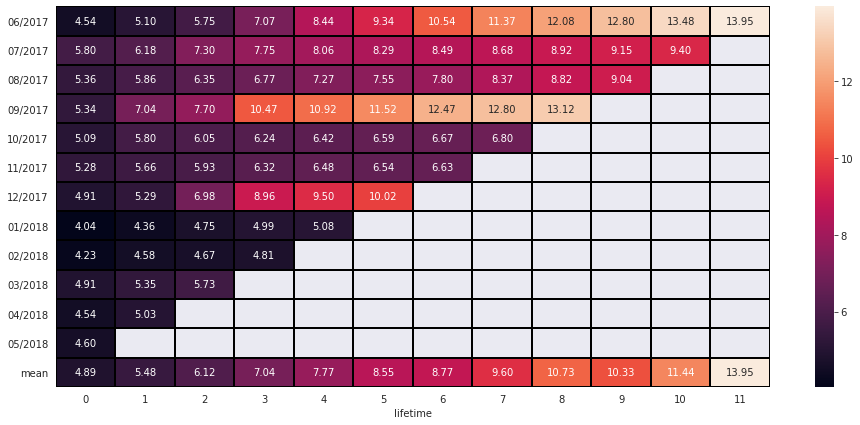

In [78]:
plt.figure(figsize=(16,7))
sns.heatmap(ltv_pivot, annot=True, fmt='.2f', linewidth=1, linecolor='black')
plt.show()

Расчитаем средний `LTV` в нулевой `lifetime`

In [51]:
ltv_pivot[0].mean().round(2)

4.8

Посчитаем средний `LTV` за пол года. В расчете не будем учитывать когорты, прожившие меньше 6 месяцев.

In [52]:
ltv_pivot[ltv_pivot.index <= '2017-12-01'][5].mean().round(2)

7.97

#### Вывод

В первый месяц каждый покупатель когорты в среднем приносит 4.8 у.е. За пол года, показатель возрастает в 1.5 раза, каждый пользователь принес уже 8 у.е. Это хороший показатель прибыли. 

На общем фоне выделяются первая и четвертая когорты. Показатель метрики в них самый высокий. Первая когорта уверенно растет вверх, а в четвертой раблюдается резкий рост на 4 `lifetime`. В переводе на месяцы это декабрь 2017 года. Именно в этом месяце наблюдался выброс по количеству пользователей, посещениям и среднему чеку. Это интересный момент. Выброс никак не коснулся остальных когорт, видимо рекламная кампания, которую мы пока только предполагаем, проводилась точечно для этой когорты. 

### Маркетинговые метрики

#### Расходы на маркетинг

Посчитаем общую сумму расходов за весь период.

In [53]:
costs['costs'].sum()

329131.62

Посмотрим на распределение расходов по источникам.

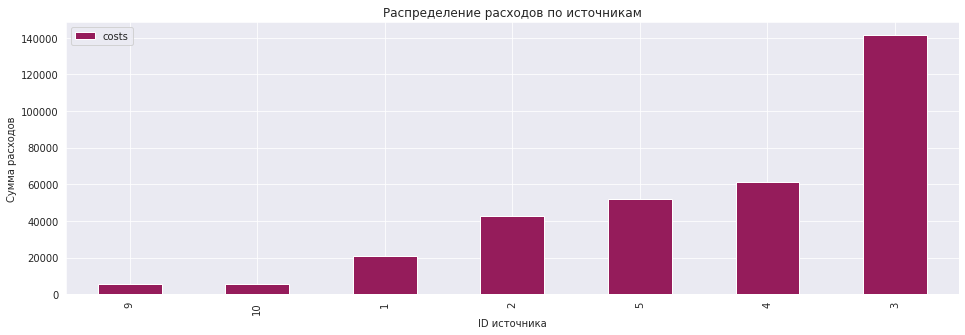

In [54]:
costs.groupby('source_id').agg({'costs': 'sum'}).sort_values(by='costs').plot(kind='bar', figsize=(16,5), color=pal[9])
plt.title('Распределение расходов по источникам')
plt.xlabel('ID источника')
plt.ylabel('Сумма расходов')
plt.show()

Посмотрим динамику расходов на маркетинг за весь период.

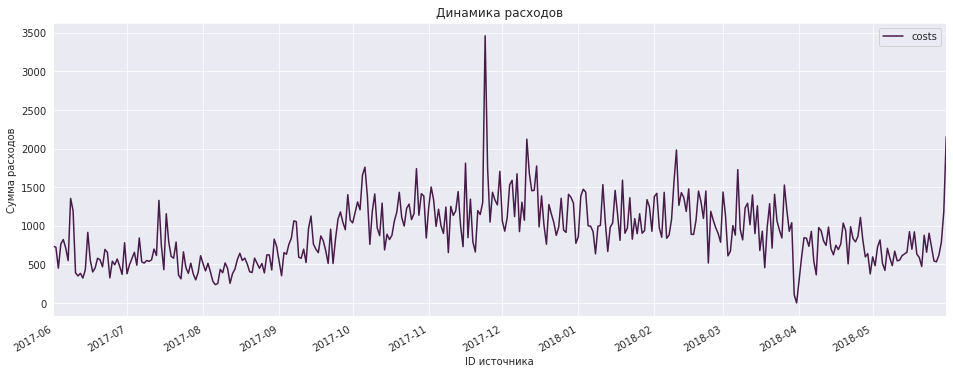

In [55]:
costs.groupby('cost_date').agg({'costs': 'sum'}).plot(figsize=(16,6), color=pal[12])
plt.title('Динамика расходов')
plt.xlabel('ID источника')
plt.ylabel('Сумма расходов')
plt.show()

Посмотрим на динамику растратов за весь период в разрезе по источникам

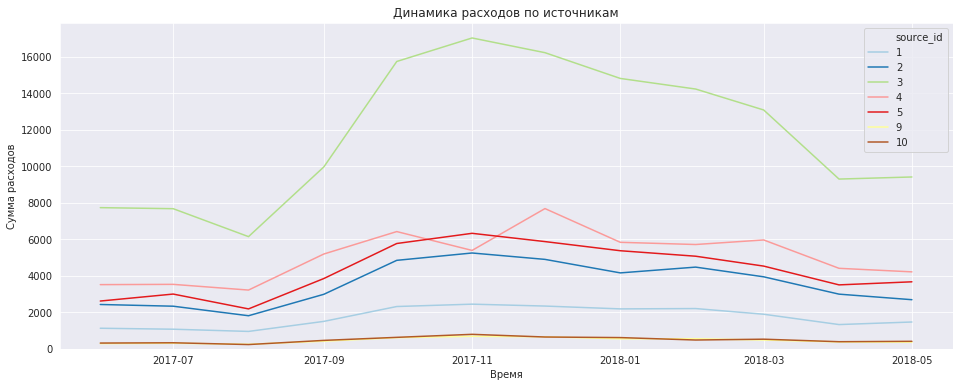

In [82]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df, x='month', y='costs', hue='source_id', palette='Paired', legend='full', estimator=np.sum)
plt.title('Динамика расходов по источникам')
plt.xlabel('Время')
plt.ylabel('Сумма расходов')
plt.ylim(0)
plt.show()

#### Вывод

График динамики за период мы уже видели, он очень похож на `DAU`. Это логично, количество посетителей сервиса напрямую зависит от количеста расходов на рекламу. Мы можем наблюдать выброс в декабре 2017, он является причиной выбросов на предыдущих графиках. Этот разовый вброс в рекламный бюджет создал выбросы в `DAU`, среднем чеке и среднем использовании сервиса. Точно таким же образом можно объяснить спад в апреле. На графике видно, что в какой то момент затраты на рекламу стали нулевыми, иза за этого появился спад в других метриках.

На динамике в разрезе по источникам видно, как в 3 и 4 кварталы 2017 повышаются расходы на рекламу. Самая активная динамика у источника 3, но и на остальные источники расходы стали выше.

#### Средний `САС` для всего проекта

Сгруппируем данные по месяцу и посчитаем сумму затрат.

In [56]:
costs['month'] = costs['cost_date'].astype('datetime64[M]')

monthly_costs = costs.groupby('month')['costs'].sum().reset_index()
monthly_costs

,month,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


Сгруппируем `orders` по когортам, найдем количество привлеченных пользователей для каждого месяца

In [57]:
cac_cohorts = orders.groupby(['first_order_month', 'lifetime']).agg({'user_id': 'nunique'}).reset_index()
cac_cohorts
users_count = cac_cohorts.query('lifetime == 0')[['user_id', 'first_order_month']]
users_count = users_count.rename(columns={'user_id':'users_count'})
users_count

,users_count,first_order_month
0,2023,2017-06-01
12,1923,2017-07-01
23,1370,2017-08-01
33,2581,2017-09-01
42,4340,2017-10-01
50,4081,2017-11-01
57,4383,2017-12-01
63,3373,2018-01-01
68,3651,2018-02-01
72,3533,2018-03-01


Объединим таблицы, расчитаем `CAC`

In [58]:
cac_df = monthly_costs.merge(users_count, left_on='month', right_on='first_order_month')
cac_df = cac_df[['month', 'costs', 'users_count']]
cac_df['cac'] = cac_df['costs'] / cac_df['users_count']
cac_df

,month,costs,users_count,cac
0,2017-06-01,18015.00,2023,8.905091
1,2017-07-01,18240.59,1923,9.485486
2,2017-08-01,14790.54,1370,10.796015
3,2017-09-01,24368.91,2581,9.441654
4,2017-10-01,36322.88,4340,8.369327
5,2017-11-01,37907.88,4081,9.288870
6,2017-12-01,38315.35,4383,8.741809
7,2018-01-01,33518.52,3373,9.937302
8,2018-02-01,32723.03,3651,8.962758
9,2018-03-01,30415.27,3533,8.608907


Расчитаем средний `CAC` за весь период.

In [59]:
cac_df['cac'].mean()

9.147357292482544

Посмотрим динамику `CAC`

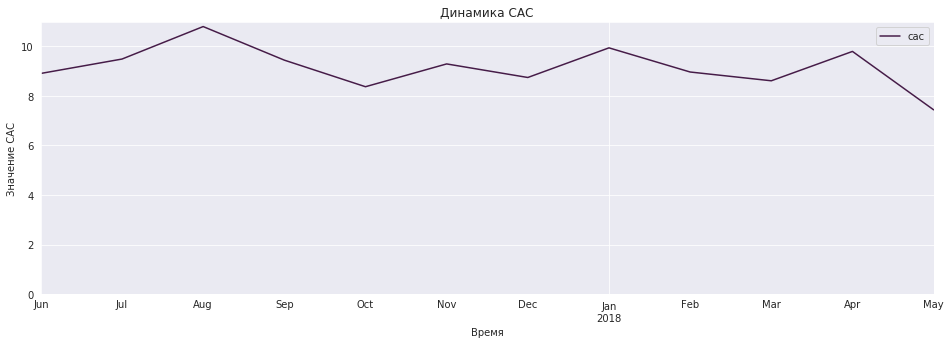

In [60]:
cac_df.plot(x='month', y='cac', figsize=(16,5), color=pal[12], ylim=0)
plt.title('Динамика САС')
plt.xlabel('Время')
plt.ylabel('Значение САС')
plt.show()

#### Вывод

Среднее значение `CAC` за весь период равно 9. Это больше чем среднее `LTV` за пол года (8). На графике не видно выраженных тенденций, показатель `CAC` практически не изменяется во времени. Точка максимума находится в августе 2017, привлечение одного клиента стоило почти 10 у.е. Минимальный `CAC` (чуть больше 8 у.е.) наблюдается в октябре 2017.

#### Средний `САС` по источникам

Найдем для каждого пользователя его первый источник.

In [61]:
visits = visits.sort_values(by='session_start')
first_source = visits.groupby('user_id')['source_id'].first()
first_source.name = 'first_source'

first_source

user_id
11863502262781          3
49537067089222          2
297729379853735         3
313578113262317         2
325320750514679         5
                       ..
18446403737806311543    5
18446424184725333426    4
18446556406699109058    3
18446621818809592527    4
18446676030785672386    3
Name: first_source, Length: 228169, dtype: int64

Составим в таблицу, в которой для каждого покупателя найдем дату первого заказа и первый источник. Сгруппируем таблицу по месяцу + источнику и подсчитаем количество уникальных покупателей. 

In [62]:
first_orders_month = orders.drop_duplicates('user_id').reset_index(drop=True)[['user_id', 'first_order_month']]

df1 = first_orders_month.merge(first_source, on='user_id')

df1 = df1.groupby(['first_order_month', 'first_source']).agg({'user_id': 'nunique'}).reset_index()
df1

,first_order_month,first_source,user_id
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384
...,...,...,...
81,2018-05-01,4,804
82,2018-05-01,5,497
83,2018-05-01,9,60
84,2018-05-01,10,130


Создадим таблицу, в которой найдем количество трат на каждый месяц для каждого источника.

In [63]:
df2 = costs.groupby(['month', 'source_id']).agg({'costs': 'sum'}).reset_index()
df2

,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12
...,...,...,...
79,2018-05-01,3,9411.42
80,2018-05-01,4,4214.21
81,2018-05-01,5,3669.56
82,2018-05-01,9,362.17


Объединим таблицы (удалим дублирующиеся столбцы).

In [64]:
df = df1.merge(df2, left_on=['first_order_month', 'first_source'], right_on=['month', 'source_id'])
df = df[['month', 'source_id', 'user_id', 'costs']]
df.head()

,month,source_id,user_id,costs
0,2017-06-01,1,190,1125.61
1,2017-06-01,2,235,2427.38
2,2017-06-01,3,638,7731.65
3,2017-06-01,4,413,3514.80
4,2017-06-01,5,384,2616.12


Посчитаем `CAC`, найдем средний `CAC` для каждого источника за весь период.

,cac
source_id,
10,4.867125
9,5.413892
4,6.439374
1,7.212107
5,7.451938
2,12.504068
3,13.802743


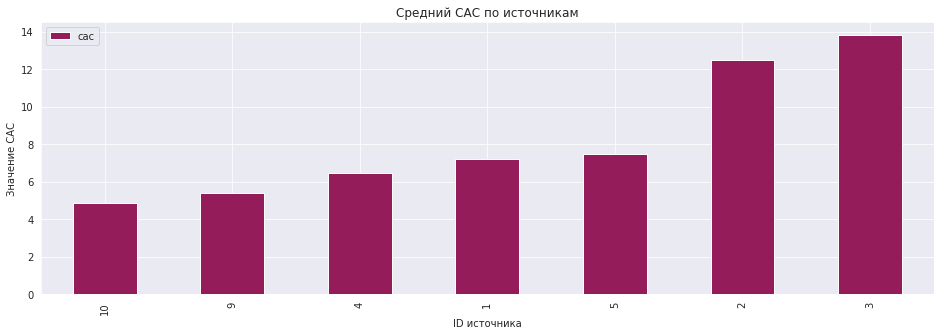

In [65]:
df['cac'] = df['costs'] / df['user_id']
display(df.groupby('source_id').agg({'cac': 'mean'}).sort_values(by='cac'))
df.groupby('source_id').agg({'cac': 'mean'}).sort_values(by='cac').plot(kind='bar', figsize=(16,5), color=pal[9])
plt.title('Средний CAC по источникам')
plt.xlabel('ID источника')
plt.ylabel('Значение САС')
plt.show()

Посмотрим динамику `CAC` по источникам за весь период

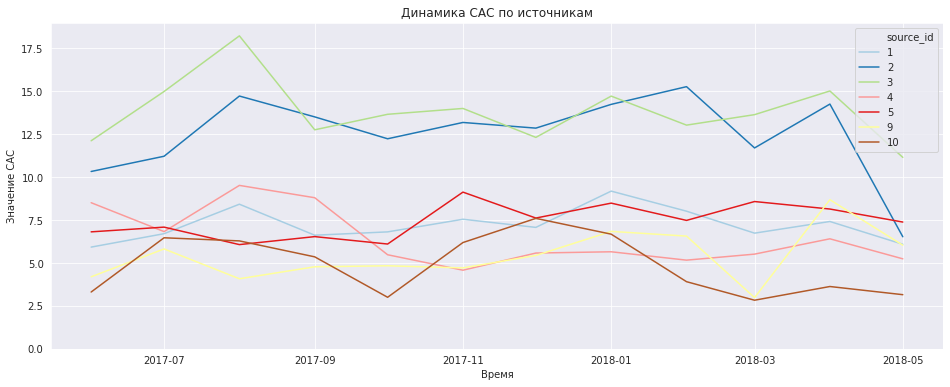

In [66]:
plt.figure(figsize=(16,6))
sns.lineplot(data=df, x='month', y='cac', hue='source_id', palette='Paired', legend='full')
plt.title('Динамика CAC по источникам')
plt.xlabel('Время')
plt.ylabel('Значение САС')
plt.ylim(0)
plt.show()

#### Вывод

Самые дорогие покупатели привлекаются из третьего и второго источника, поэтому покупать у них трафик невыгодно.

На графике динамики метрики, тенденции не присутствуют. Можно заметить лишь небольшое снижение `CAC` у четвертого источника.

#### `ROMI`

Добавим в таблицу `orders` информацию о первом источнике пользователя.

In [67]:
orders = orders.merge(first_source, on='user_id')
orders.head()

,order_datetime,revenue,user_id,order_date,first_order_date,order_month,first_order_month,lifetime,first_source
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-06-01,2017-06-01,0,3


Создадим таблицу `monthly_costs` в которой сохраним количество расходов в группировке по месяцу и источнику.

In [68]:
monthly_costs = costs.groupby(['month', 'source_id'])['costs'].sum().reset_index()
monthly_costs.head()

,month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


Создадим таблицу `cohorts` в которой сгруппируем `orders` по когортам и по источникам. Посчитаем общую выручку и количество уникальных покупателей.

In [69]:
cohorts = (orders
           .groupby(['first_order_month', 'lifetime', 'first_source'])
           .agg({'revenue': 'sum', 'user_id': 'nunique'})
           .reset_index()
          )
cohorts.head()

,first_order_month,lifetime,first_source,revenue,user_id
0,2017-06-01,0,1,1378.70,190
1,2017-06-01,0,2,1043.68,235
2,2017-06-01,0,3,2804.34,638
3,2017-06-01,0,4,1959.84,413
4,2017-06-01,0,5,1898.89,384


Добавим в таблицу данные о тратах по месяцу и источнику, срежем дублирующиеся столбцы.

In [70]:
cohorts = cohorts.merge(monthly_costs, left_on=['first_order_month', 'first_source'], right_on=['month', 'source_id'])
cohorts = cohorts[['first_order_month', 'lifetime', 'first_source', 'revenue', 'user_id', 'costs']]
cohorts.head()

,first_order_month,lifetime,first_source,revenue,user_id,costs
0,2017-06-01,0,1,1378.70,190,1125.61
1,2017-06-01,1,1,414.98,16,1125.61
2,2017-06-01,2,1,419.43,10,1125.61
3,2017-06-01,3,1,714.24,9,1125.61
4,2017-06-01,4,1,811.20,12,1125.61


Добавим количество покупателей в нулевой `lifetime` для каждой когорты.

In [71]:
users_counts = cohorts.query('lifetime == 0')[['first_order_month', 'first_source', 'user_id']]
users_counts = users_counts.rename(columns={'user_id':'cohort_users'}) 
cohorts = cohorts.merge(users_counts, on=['first_order_month', 'first_source'])
cohorts.head()

,first_order_month,lifetime,first_source,revenue,user_id,costs,cohort_users
0,2017-06-01,0,1,1378.70,190,1125.61,190
1,2017-06-01,1,1,414.98,16,1125.61,190
2,2017-06-01,2,1,419.43,10,1125.61,190
3,2017-06-01,3,1,714.24,9,1125.61,190
4,2017-06-01,4,1,811.20,12,1125.61,190


Расчитаем метрики:
- `LTV`
- `CAC`
- `ROMI`

In [72]:
cohorts['ltv'] = cohorts['revenue'] / cohorts['cohort_users']
cohorts['cac'] = cohorts['costs'] / cohorts['cohort_users']
cohorts['romi'] = cohorts['ltv'] / cohorts['cac']
cohorts.head()

,first_order_month,lifetime,first_source,revenue,user_id,costs,cohort_users,ltv,cac,romi
0,2017-06-01,0,1,1378.70,190,1125.61,190,7.256316,5.924263,1.224847
1,2017-06-01,1,1,414.98,16,1125.61,190,2.184105,5.924263,0.368671
2,2017-06-01,2,1,419.43,10,1125.61,190,2.207526,5.924263,0.372625
3,2017-06-01,3,1,714.24,9,1125.61,190,3.759158,5.924263,0.634536
4,2017-06-01,4,1,811.20,12,1125.61,190,4.269474,5.924263,0.720676


В цикле выведем визуализацию когортного анализа `ROMI` для каждого источника.

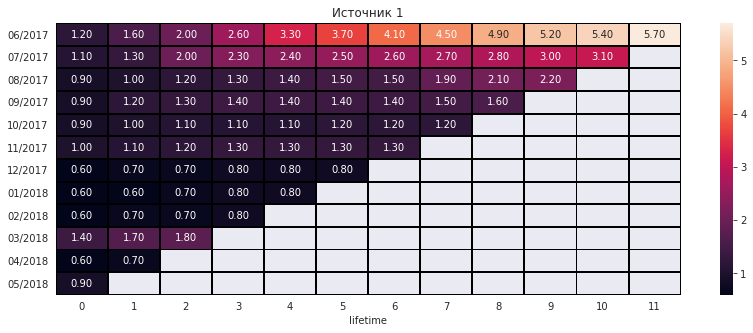

Средняя когорта, источник 1 :


lifetime
0     0.891667
1     1.054545
2     1.270000
3     1.377778
4     1.562500
5     1.771429
6     2.016667
7     2.360000
8     2.850000
9     3.466667
10    4.250000
11    5.700000
dtype: float64

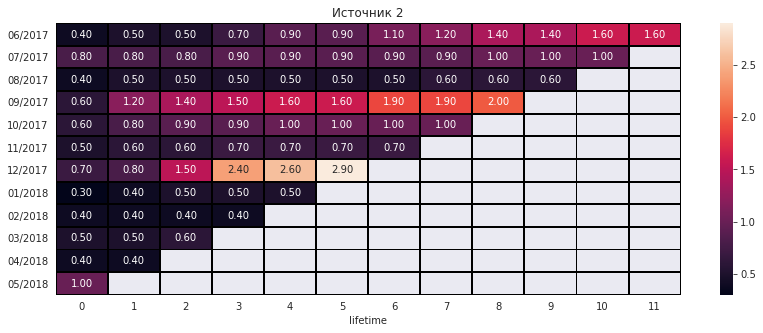

Средняя когорта, источник 2 :


lifetime
0     0.550000
1     0.627273
2     0.770000
3     0.944444
4     1.087500
5     1.214286
6     1.016667
7     1.120000
8     1.250000
9     1.000000
10    1.300000
11    1.600000
dtype: float64

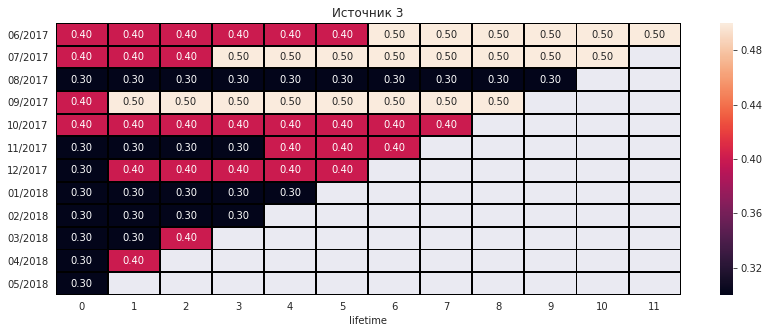

Средняя когорта, источник 3 :


lifetime
0     0.333333
1     0.363636
2     0.370000
3     0.377778
4     0.400000
5     0.414286
6     0.433333
7     0.440000
8     0.450000
9     0.433333
10    0.500000
11    0.500000
dtype: float64

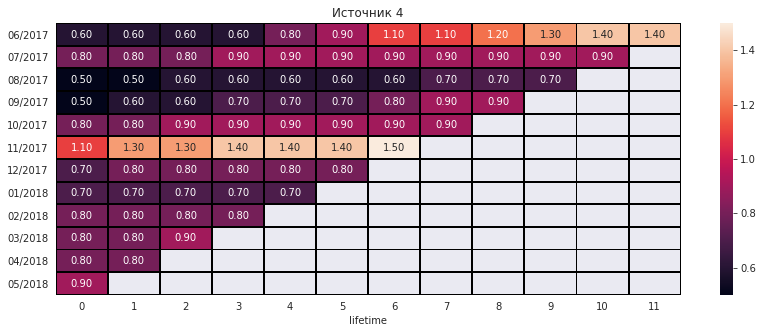

Средняя когорта, источник 4 :


lifetime
0     0.750000
1     0.772727
2     0.800000
3     0.822222
4     0.850000
5     0.885714
6     0.966667
7     0.900000
8     0.925000
9     0.966667
10    1.150000
11    1.400000
dtype: float64

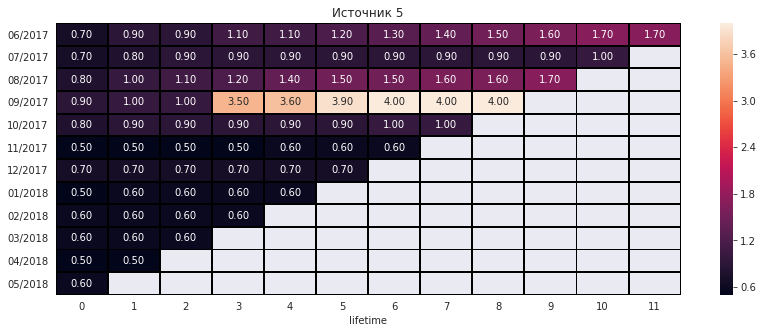

Средняя когорта, источник 5 :


lifetime
0     0.658333
1     0.736364
2     0.780000
3     1.111111
4     1.225000
5     1.385714
6     1.550000
7     1.780000
8     2.000000
9     1.400000
10    1.350000
11    1.700000
dtype: float64

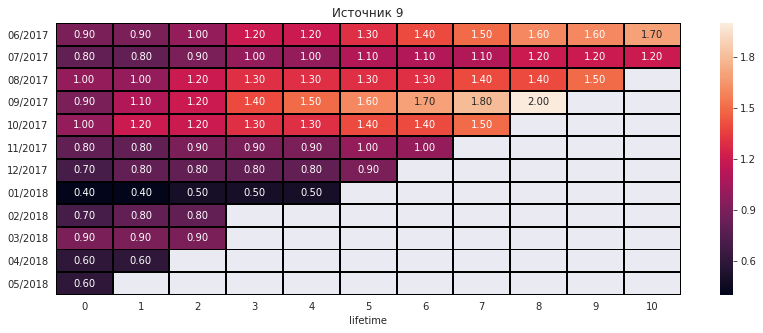

Средняя когорта, источник 9 :


lifetime
0     0.775000
1     0.845455
2     0.940000
3     1.050000
4     1.062500
5     1.228571
6     1.316667
7     1.460000
8     1.550000
9     1.433333
10    1.450000
dtype: float64

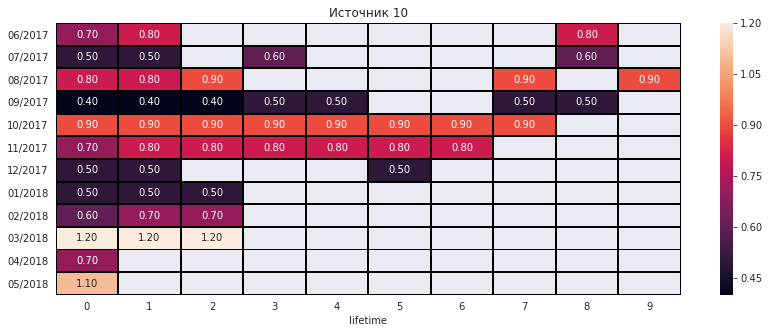

Средняя когорта, источник 10 :


lifetime
0    0.716667
1    0.710000
2    0.771429
3    0.700000
4    0.733333
5    0.733333
6    0.850000
7    0.766667
8    0.633333
9    0.900000
dtype: float64

In [73]:
sources = cohorts['first_source'].unique()

for i in sources:
    
    table = cohorts[cohorts['first_source'] == i]
    
    table_pivot = table.pivot_table(index='first_order_month', columns='lifetime', values='romi').cumsum(axis=1).round(1)
    table_pivot.index = table_pivot.index.strftime("%m/%Y")
    
    plt.figure(figsize=(14,5))
    sns.heatmap(table_pivot, annot=True, fmt='.2f', linewidth=1, linecolor='black')
    plt.title('Источник ' + str(i))
    plt.show()
    
    print('Средняя когорта, источник ' + str(i), ':')
    display(table_pivot.mean(axis=0))

Посчитаем средний `ROMI` за пол года для каждого источника

In [74]:
for i in sources:
    table = cohorts[cohorts['first_source'] == i]
    table_pivot = table.pivot_table(index='first_order_month', columns='lifetime', values='romi').cumsum(axis=1).round(1)
    print('Средний ROMI за полгода. Источник ' + str(i), ': ', table_pivot[5].mean().round(2))

Средний ROMI за полгода. Источник 1 :  1.77
Средний ROMI за полгода. Источник 2 :  1.21
Средний ROMI за полгода. Источник 3 :  0.41
Средний ROMI за полгода. Источник 4 :  0.89
Средний ROMI за полгода. Источник 5 :  1.39
Средний ROMI за полгода. Источник 9 :  1.23
Средний ROMI за полгода. Источник 10 :  0.73


#### Вывод

Мы получили много данных об окупаемости источников. 

- Первый источник - самый лучший. В среднем, он окупается уже на второй месяц, а за пол года окупился лучше всех, почти в 2 раза. 

- Второй источник имеет высокий `CAC`, это мы выяснили в предыдущем шаге, покупатели оттуда дороже. Он имеет не лучшие показатели - в среднем окупается на пятый месяц, а за пол года окупился на 120%. 

- Третий источник - проблема которую надо решать. Он имеет наивысший `CAC` и самый низкий `ROMI`. За год он окупился на 50%, за пол года на 40%.

- Четвертый источник имеет плохие показатели. Он окупился только к 11 месяцу.

- Пятый источник выгодный. Он окупился на четвертый месяц, а за пол года окупился почти на 140%.

- Девятый источник так же назовем выгодным, он окупился на четвертый месяц, за пол года окупился на 120%.

- Десятый источник не окупил себя за год(90%), за пол года окупился на 70%

## Выводы и рекомендации

### Источники трафика

**Выделим группу выгодных источников, на которые нужно делать упор:**
- Источник 1 - самый выгодный из всех. Имеет невысокий `CAC` и самый высокий `ROMI`. На него тратится сравнительно мало денег, первым делом нужно вкладываться в него.


- Источник 2 - имеет `CAC` выше остальных, но хороший `ROMI` (окупается на пятый месяц). На него так же тратится немного денег, однако он худший из лучших, не стоит рассматривать его как основной.


- Источник 5 - невысокий `CAC`, второе место по `ROMI`. На пятый источник тратят примерно столько же, сколько и на первые два. Расходы на него нужно повышать - он выгодный.


- Источник 9 - на него тратят меньше всего денег, что плохо. Источник выгодный - у него самый низкий `CAC` из всех и хорошая окупаемость. Нужно вкладывать в него деньги.

Афише срочно нужно отказываться от третьего источника, он самый невыгодный. Окупаемость за год всего 50% и самый высокий `CAC`, при этом, в него вкладывается больше всего денег. 

Десятый источник так же не заслуживает внимания. Хоть на него и было потрачено мало средств, он их не окупил.

*Для определение выгодности источника, использовали метрику окупаемости `ROMI`, метрику стоимости пользователя `CAC`, а так же количество потраченных на тот или иной источник средств.*

### Выводы по метрикам

**Продуктовые метрики**

- Первым делом посчитали такие метрики как `DAU`, `WAU`, `MOU` - они дали информацию о потоке посетителей. В день сервис посещают примерно 1000 человек, в неделю примерно 6000, а в месяц 23000. Это хороший трафик. Посмотрев на изменения метрик во времени выяснили, что за последние 2 квартала 2017 года количество посетителей выросло.

- Посчитали среднее количество использований сервиса в день. Пользователи очень редко используют сервис более 1 раза в день, это звучит логично, ведь Афиша - это сервис по продажам билетов. Такой показатель вполне характерен для нее.

- Нашли время типичной сессии, оно равно 1 минуте. Это значит, что сервис хорошо сделан. Он понятный и удобный, пользователи не тратят много времени чтобы в нем разобраться. Они посещают сервис с целью либо посмотреть билеты, либо купить, и быстро справляются с этими задачами.

- Посчитали `Retention Rate` с помощью когортного анализа. Выяснили, что на следующий месяц возвращаются примерно 6% клиентов. Это характерно для нашего сервиса, редкие клиенты покупают билеты в театр каждый месяц.

**Метрики электронной коммерции**

- Посчитали типичный период с момента первого входа на сервис до первой покупки. Выяснили, что большинство покупателей совершают покупку в первый же день, как зашли на сервис. Этот показатель типичен для афиши, чаще всего люди знают куда идти, и не выбирают билеты по несколько дней.

- С помощью когортного анализа посчитали, сколько покупок, в среднем совершает пользователь за 6 месяцев. Получили значение метрики равное 1.44. Это значит, что почти 50% покупателей совершают вторую покупку за пол года. Выделили, что в первой когорте метрика растет активнее. За год каждый пользователь в среднем совершил более чем по 2 покупки.

- Рассчитали средний чек, он оказался равен 5 у.е. Тенденций, к изменению этой метрики во времени не нашли. Это характерно для афиши. Клиенты покупают билеты, они не могут купить их больше, чем им нужно, соответственно средний чек напрямую зависит от цен на билеты, которые, судя по всему, не менялись.

- С помощью когортного анализа рассчитали `LTV`. В среднем, за пол года, каждый пользователь приносит 8 у.е. прибыли. Это в 1.5 раза больше, чем в первый `lifetime` когорт. Выяснили, что первая и четвертая когорты приносят больше прибыли, чем остальные. 

**Маркетинговые метрики**

- Изучили расходы на маркетинг: сколько тратится на каждый источник и как изменяется среднее количество трат во времени. Выяснили, что график очень похож на `DAU`, в третий и четвертый квартал 2017 расходы на рекламу немного выросли.

- Посчитали `CAC` для всего проекта. Выяснили, что метрика практически не изменяется во времени и ее среднее значение равно 9 у.е.

- Посчитали `CAC` в разрезе по источникам. Во времени метрики практически не изменяются. Выяснили, что второй и третий источник менее выгодны чем остальные, их `CAC` заметно выше (привлечение пользователей выходит дороже).

- Посчитали `ROMI` в разрезе по источникам, одна из важнейших метрик, которая позволила определить перспективные источники и отсеять невыгодные. Выяснили, что третий источник, на который тратится больше всего денег, не окупил себя за год, а первый, второй, пятый, девятый, окупаются за довольно короткий период. 

### Итоги когортного анализа

**Определим самые перспективные когорты.**

- **Retention Rate:** посетители первой когорты возвращаются на сервис чаще, чем в остальных когортах. Старые клиенты активнее продолжают использовать сервис, чем новые. К старым клиентам можно отнести первые 4 когорты, их Retention Rate самый высокий.

- **Среднее количество покупок на одного покупателя:** в этой метрике первая когорта покупателей так же выделяется на фоне остальных, клиенты совершают заметно больше покупок. Так же можно выделить третью, четвертую и шестую когорты. Они совсем немного, но отличаются от остальных, покупки совершаются чаще.

- **LTV:** метрика показывает, сколько прибыли в среднем приносит 1 пользователь когорты. Пользователи первой когорты тратят больше денег на заказы, их `LTV` растет быстрее. На общем фоне сильно выделяется четвертая когорта. В декабре 2017 наблюдается резкий скачок `LTV`. Этот момент был описан в проекте. Мы видели этот выброс на графиках `DAU`, среднего чека и среднего количества использований сервиса. Как выяснилось позже, в этот день был скачок затрат на маркетинг. Судя по всему, это была точечная рекламная кампания для четвертой когорты, которая вырастила их `LTV` до рекордного размера. Неплохую прибыль так же приносят вторая, третья и седьмая когорты.

**Подведем итог:** Самыми ценными являются пользователи первой когорты, они лидируют по всем метрикам (часто возвращаются, делают много заказов, тратят много денег). Остальных будем отбирать по `LTV`, так как это основной критерий. Больше всего денег за год принесла 4 когорта, хорошая прибыль у второй, третьей и седьмой. Именно на эти когорты стоит обратить внимание, именно они составляют основу активной клиентской базы. 